### Import libraries and read data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime as dt

In [2]:
os.chdir('..')
os.getcwd()

'/Users/benmurphy/Library/CloudStorage/OneDrive-Personal/github-projects/rugby/rugby'

In [3]:
raw_df = pd.read_csv("0_data/match_data/urc_matches.csv")
raw_df

,match_date_,Home team,Away team,home_n_tries,minutes_of_home_tries,away_n_tries,minutes_of_away_tries,home_n_pen_kicks,minutes_of_home_pen_kicks,away_n_pen_kicks,...,pkey,home_score,away_score,score_diff,home_pack_weight,away_pack_weight,home_forwards_ages,home_backs_ages,away_forwards_ages,away_backs_ages
0,2021-09-24,ZEBRE,LIONS,4.0,51_61_64_57,5.0,32_19_21_15_10,0.0,NaN,1.0,...,ZEBRE_LIONS_2021-09-24,26,38,-12,924,919,26,26,27,25
1,2021-09-24,CARDIFF,CONNACHT,5.0,38_50_69_9_73,2.0,12_80,0.0,NaN,3.0,...,CARDIFF_CONNACHT_2021-09-24,33,21,12,929,892,28,27,26,26
2,2021-09-24,ULSTER,GLASGOW,5.0,22_43_48_58_3,4.0,42_14_64_54,0.0,NaN,1.0,...,ULSTER_GLASGOW_2021-09-24,35,29,6,906,912,29,26,28,26
3,2021-09-25,MUNSTER,SHARKS,6.0,43_50_35_5_78_76,2.0,56_69,2.0,28_68,1.0,...,MUNSTER_SHARKS_2021-09-25,42,17,25,907,946,28,25,26,24
4,2021-09-25,BENETTON,STORMERS,3.0,15_58_70,2.0,1_43,1.0,62,2.0,...,BENETTON_STORMERS_2021-09-25,22,18,4,909,903,24,26,27,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,2025-05-17,LEINSTER,GLASGOW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LEINSTER_GLASGOW_2025-05-17,-1,-1,0,-1,-1,-1,-1,-1,-1
593,2025-05-17,BULLS,DRAGONS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,BULLS_DRAGONS_2025-05-17,-1,-1,0,-1,-1,-1,-1,-1,-1
594,2025-05-17,LIONS,OSPREYS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LIONS_OSPREYS_2025-05-17,-1,-1,0,-1,-1,-1,-1,-1,-1
595,2025-05-17,ZEBRE,CONNACHT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,ZEBRE_CONNACHT_2025-05-17,-1,-1,0,-1,-1,-1,-1,-1,-1


In [4]:
raw_df.dtypes

match_date_                     object
Home team                       object
Away team                       object
home_n_tries                   float64
minutes_of_home_tries           object
away_n_tries                   float64
minutes_of_away_tries           object
home_n_pen_kicks               float64
minutes_of_home_pen_kicks       object
away_n_pen_kicks               float64
minutes_of_away_pen_kicks       object
home_n_conversions             float64
minutes_of_home_conversions     object
away_n_conversions             float64
minutes_of_away_conversions     object
competition                     object
round_stage                     object
pkey                            object
home_score                       int64
away_score                       int64
score_diff                       int64
home_pack_weight                 int64
away_pack_weight                 int64
home_forwards_ages               int64
home_backs_ages                  int64
away_forwards_ages       

In [5]:
matches = raw_df[['match_date_', 'Home team', 'Away team', 'home_n_tries', 'away_n_tries', 'pkey']].copy()

matches['Total Tries'] = matches['home_n_tries'] + matches['away_n_tries']

matches.sort_values(by='match_date_')

,match_date_,Home team,Away team,home_n_tries,away_n_tries,pkey,Total Tries
0,2021-09-24,ZEBRE,LIONS,4.0,5.0,ZEBRE_LIONS_2021-09-24,9.0
1,2021-09-24,CARDIFF,CONNACHT,5.0,2.0,CARDIFF_CONNACHT_2021-09-24,7.0
2,2021-09-24,ULSTER,GLASGOW,5.0,4.0,ULSTER_GLASGOW_2021-09-24,9.0
3,2021-09-25,MUNSTER,SHARKS,6.0,2.0,MUNSTER_SHARKS_2021-09-25,8.0
4,2021-09-25,BENETTON,STORMERS,3.0,2.0,BENETTON_STORMERS_2021-09-25,5.0
...,...,...,...,...,...,...,...
594,2025-05-17,LIONS,OSPREYS,NaN,NaN,LIONS_OSPREYS_2025-05-17,NaN
595,2025-05-17,ZEBRE,CONNACHT,NaN,NaN,ZEBRE_CONNACHT_2025-05-17,NaN
592,2025-05-17,LEINSTER,GLASGOW,NaN,NaN,LEINSTER_GLASGOW_2025-05-17,NaN
593,2025-05-17,BULLS,DRAGONS,NaN,NaN,BULLS_DRAGONS_2025-05-17,NaN


In [6]:
# create a season column
mask_24_25 = (matches['match_date_'] > '2024-07-31') & (matches['match_date_'] <= '2025-07-11')
mask_23_24 = (matches['match_date_'] > '2023-07-31') & (matches['match_date_'] <= '2024-07-11')
mask_22_23 = (matches['match_date_'] > '2022-07-31') & (matches['match_date_'] <= '2023-07-11')
mask_21_22 = (matches['match_date_'] > '2021-07-31') & (matches['match_date_'] <= '2022-07-11')

matches.loc[mask_24_25, "Season"] = "24/25 (5 rounds)"
matches.loc[mask_23_24, "Season"] = "23/24"
matches.loc[mask_22_23, "Season"] = "22/23"
matches.loc[mask_21_22, "Season"] = "21/22"

matches

,match_date_,Home team,Away team,home_n_tries,away_n_tries,pkey,Total Tries,Season
0,2021-09-24,ZEBRE,LIONS,4.0,5.0,ZEBRE_LIONS_2021-09-24,9.0,21/22
1,2021-09-24,CARDIFF,CONNACHT,5.0,2.0,CARDIFF_CONNACHT_2021-09-24,7.0,21/22
2,2021-09-24,ULSTER,GLASGOW,5.0,4.0,ULSTER_GLASGOW_2021-09-24,9.0,21/22
3,2021-09-25,MUNSTER,SHARKS,6.0,2.0,MUNSTER_SHARKS_2021-09-25,8.0,21/22
4,2021-09-25,BENETTON,STORMERS,3.0,2.0,BENETTON_STORMERS_2021-09-25,5.0,21/22
...,...,...,...,...,...,...,...,...
592,2025-05-17,LEINSTER,GLASGOW,NaN,NaN,LEINSTER_GLASGOW_2025-05-17,NaN,24/25 (5 rounds)
593,2025-05-17,BULLS,DRAGONS,NaN,NaN,BULLS_DRAGONS_2025-05-17,NaN,24/25 (5 rounds)
594,2025-05-17,LIONS,OSPREYS,NaN,NaN,LIONS_OSPREYS_2025-05-17,NaN,24/25 (5 rounds)
595,2025-05-17,ZEBRE,CONNACHT,NaN,NaN,ZEBRE_CONNACHT_2025-05-17,NaN,24/25 (5 rounds)


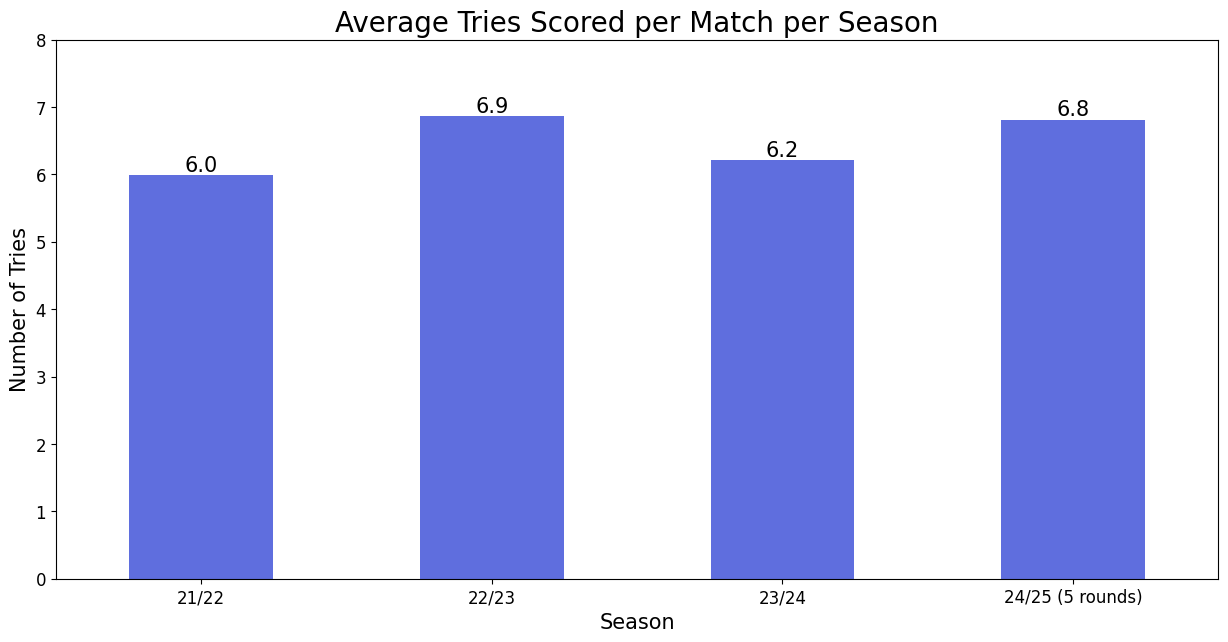

In [7]:
# create a subplot with 2 rows and 1 columns
fig, ax = plt.subplots(1,1, figsize=(15, 7))
# plt.grid(True)
sns.barplot(x="Season", y="Total Tries", 
            data=matches, 
            errorbar=None, 
            fill=True,
            gap=0.01,
           width=0.5,
           color='#4A5EF3')

bars_0 = ax.containers[0]
ax.bar_label(bars_0, labels=[f'{value:.1f}' for value in bars_0.datavalues], fontsize=15)

plt.ylim(0, 8)  # Set the y-axis limits from 0 to 8

ax.axes.set_title("Average Tries Scored per Match in each Season",fontsize=20)
ax.set_xlabel("Season",fontsize=15)
ax.set_ylabel("Number of Tries",fontsize=15)

ax.yaxis.set_tick_params(labelsize = 12);
ax.xaxis.set_tick_params(labelsize = 12);

plt.show()

### Data manipulation 
- we need to reshape our dataframe so that both the home and the away team have a row each and an indicator whether they are playing at home or away

In [12]:
common_features = ['pkey', 'match_date_', 'Home team', 'Away team', 'Season']

# home data
temp1 = matches[common_features+['home_n_tries']]
temp1['Team Location'] = "Home Team"
temp1.rename(columns={"Home team": "Team",
                    "Away team": "Opponents",
                    "home_n_tries": "Tries Scored"},
                    inplace=True)

# away data
temp2 = matches[common_features + ['away_n_tries']]
temp2['Team Location'] = "Away Team"
temp2.rename(columns={"Away team": "Team",
                    "Home team": "Opponents",
                    "away_n_tries": "Tries Scored"},
                    inplace=True)

# concat dfs together
team_per_row_df = pd.concat([temp1, temp2])
team_per_row_df.reset_index(inplace=True, drop=True)

team_per_row_df.rename(columns={"match_date_": "Match Date",
                    "pkey": "Primary Key"},
                    inplace=True)

team_per_row_df['Match Date'] = pd.to_datetime(team_per_row_df['Match Date'])

del(temp1)
del(temp2)

team_per_row_df

/var/folders/xr/_sn2jn9s3xd13fp9ljzys7tm0000gn/T/ipykernel_25063/4261478946.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['Team Location'] = "Home Team"
/var/folders/xr/_sn2jn9s3xd13fp9ljzys7tm0000gn/T/ipykernel_25063/4261478946.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1.rename(columns={"Home team": "Team",
/var/folders/xr/_sn2jn9s3xd13fp9ljzys7tm0000gn/T/ipykernel_25063/4261478946.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

,Primary Key,Match Date,Team,Opponents,Season,Tries Scored,Team Location
0,ZEBRE_LIONS_2021-09-24,2021-09-24,ZEBRE,LIONS,21/22,4.0,Home Team
1,CARDIFF_CONNACHT_2021-09-24,2021-09-24,CARDIFF,CONNACHT,21/22,5.0,Home Team
2,ULSTER_GLASGOW_2021-09-24,2021-09-24,ULSTER,GLASGOW,21/22,5.0,Home Team
3,MUNSTER_SHARKS_2021-09-25,2021-09-25,MUNSTER,SHARKS,21/22,6.0,Home Team
4,BENETTON_STORMERS_2021-09-25,2021-09-25,BENETTON,STORMERS,21/22,3.0,Home Team
...,...,...,...,...,...,...,...
1189,LEINSTER_GLASGOW_2025-05-17,2025-05-17,GLASGOW,LEINSTER,24/25 (5 rounds),NaN,Away Team
1190,BULLS_DRAGONS_2025-05-17,2025-05-17,DRAGONS,BULLS,24/25 (5 rounds),NaN,Away Team
1191,LIONS_OSPREYS_2025-05-17,2025-05-17,OSPREYS,LIONS,24/25 (5 rounds),NaN,Away Team
1192,ZEBRE_CONNACHT_2025-05-17,2025-05-17,CONNACHT,ZEBRE,24/25 (5 rounds),NaN,Away Team


In [13]:
team_per_row_df.sort_values(by='Match Date')

,Primary Key,Match Date,Team,Opponents,Season,Tries Scored,Team Location
0,ZEBRE_LIONS_2021-09-24,2021-09-24,ZEBRE,LIONS,21/22,4.0,Home Team
599,ULSTER_GLASGOW_2021-09-24,2021-09-24,GLASGOW,ULSTER,21/22,4.0,Away Team
598,CARDIFF_CONNACHT_2021-09-24,2021-09-24,CONNACHT,CARDIFF,21/22,2.0,Away Team
597,ZEBRE_LIONS_2021-09-24,2021-09-24,LIONS,ZEBRE,21/22,5.0,Away Team
2,ULSTER_GLASGOW_2021-09-24,2021-09-24,ULSTER,GLASGOW,21/22,5.0,Home Team
...,...,...,...,...,...,...,...
594,LIONS_OSPREYS_2025-05-17,2025-05-17,LIONS,OSPREYS,24/25 (5 rounds),NaN,Home Team
593,BULLS_DRAGONS_2025-05-17,2025-05-17,BULLS,DRAGONS,24/25 (5 rounds),NaN,Home Team
592,LEINSTER_GLASGOW_2025-05-17,2025-05-17,LEINSTER,GLASGOW,24/25 (5 rounds),NaN,Home Team
1192,ZEBRE_CONNACHT_2025-05-17,2025-05-17,CONNACHT,ZEBRE,24/25 (5 rounds),NaN,Away Team


In [14]:
# filter out any future fixtures, only keep historical results
today = dt.datetime.today()

df = team_per_row_df.loc[team_per_row_df['Match Date'] < today]

df = df.sort_values(by=['Match Date', 'Team Location'], ascending=[True, False])

df = df.reset_index(drop=True)

df.tail(16)

,Primary Key,Match Date,Team,Opponents,Season,Tries Scored,Team Location
966,SCARLETS_BULLS_2024-10-18,2024-10-18,SCARLETS,BULLS,24/25 (5 rounds),3.0,Home Team
967,ULSTER_OSPREYS_2024-10-18,2024-10-18,ULSTER,OSPREYS,24/25 (5 rounds),6.0,Home Team
968,SCARLETS_BULLS_2024-10-18,2024-10-18,BULLS,SCARLETS,24/25 (5 rounds),3.0,Away Team
969,ULSTER_OSPREYS_2024-10-18,2024-10-18,OSPREYS,ULSTER,24/25 (5 rounds),2.0,Away Team
970,DRAGONS_BENETTON_2024-10-19,2024-10-19,DRAGONS,BENETTON,24/25 (5 rounds),3.0,Home Team
971,SHARKS_GLASGOW_2024-10-19,2024-10-19,SHARKS,GLASGOW,24/25 (5 rounds),3.0,Home Team
972,CONNACHT_LEINSTER_2024-10-19,2024-10-19,CONNACHT,LEINSTER,24/25 (5 rounds),2.0,Home Team
973,EDINBURGH_CARDIFF_2024-10-19,2024-10-19,EDINBURGH,CARDIFF,24/25 (5 rounds),4.0,Home Team
974,ZEBRE_LIONS_2024-10-19,2024-10-19,ZEBRE,LIONS,24/25 (5 rounds),0.0,Home Team
975,STORMERS_MUNSTER_2024-10-19,2024-10-19,STORMERS,MUNSTER,24/25 (5 rounds),4.0,Home Team


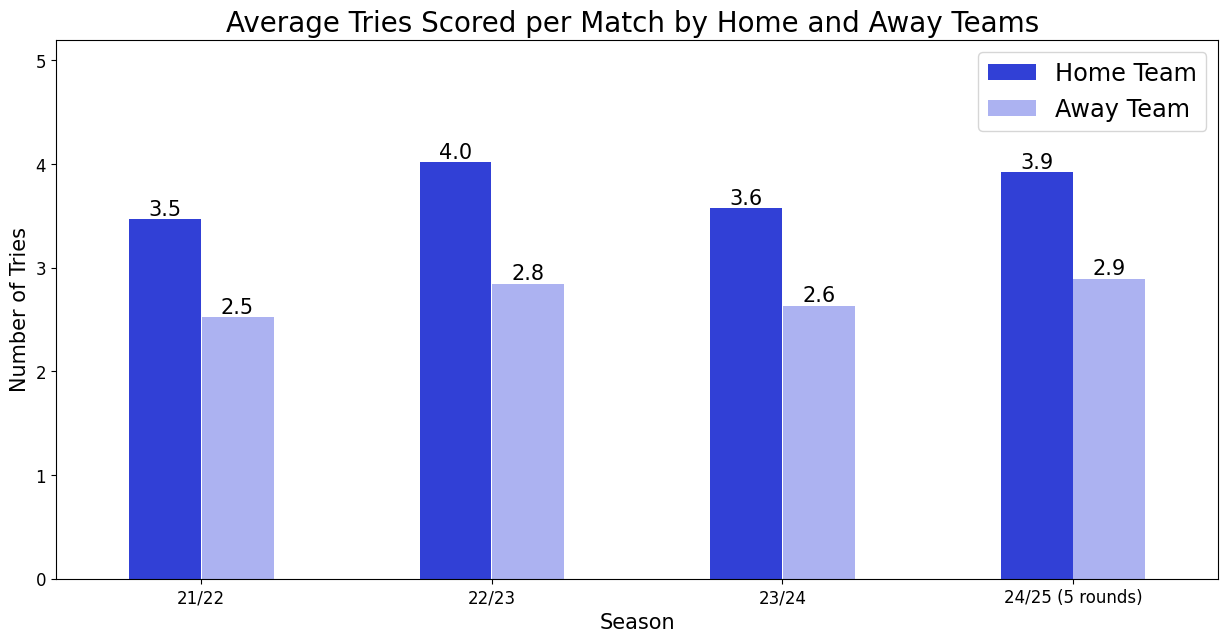

In [16]:
# create a subplot with 2 rows and 1 columns
fig, ax = plt.subplots(1,1, figsize=(15, 7))
# plt.grid(True)
sns.barplot(x="Season", hue="Team Location", y="Tries Scored", 
            data=df, 
            errorbar=None, 
            fill=True,
            gap=0.01,
            width=0.5,
            palette=['#1529F2', '#A1A9FC'])

bars_0 = ax.containers[0]
ax.bar_label(bars_0, labels=[f'{value:.1f}' for value in bars_0.datavalues], fontsize=15)

bars_1 = ax.containers[1]
ax.bar_label(bars_1, labels=[f'{value:.1f}' for value in bars_1.datavalues], fontsize=15)

plt.ylim(0, 5.2)  # Set the y-axis limits from 0 to 5

ax.axes.set_title("Average Tries Scored per Match by Home and Away Teams ",fontsize=20)
ax.set_xlabel("Season",fontsize=15)
ax.set_ylabel("Number of Tries",fontsize=15)

ax.yaxis.set_tick_params(labelsize = 12);
ax.xaxis.set_tick_params(labelsize = 12);
ax.legend(fontsize='xx-large')

plt.show()

In [31]:
team_tries_home_away = df.groupby(["Team", "Team Location"])['Tries Scored'].mean().round(1).reset_index()
team_tries_home_away

,Team,Team Location,Tries Scored
0,BENETTON,Away Team,2.6
1,BENETTON,Home Team,3.3
2,BULLS,Away Team,3.0
3,BULLS,Home Team,5.1
4,CARDIFF,Away Team,2.3
5,CARDIFF,Home Team,3.1
6,CONNACHT,Away Team,2.7
7,CONNACHT,Home Team,3.6
8,DRAGONS,Away Team,2.3
9,DRAGONS,Home Team,2.1


In [65]:
temp = team_tries_home_away.pivot(index = ['Team'], columns='Team Location', values='Tries Scored').reset_index().rename_axis(None, axis=1)

temp['Difference'] = temp['Home Team'] - temp['Away Team']

temp.sort_values(by='Difference', ascending=False)

,Team,Away Team,Home Team,Difference
1,BULLS,3.0,5.1,2.1
8,LIONS,2.2,4.2,2.0
7,LEINSTER,3.5,5.4,1.9
9,MUNSTER,2.8,4.3,1.5
5,EDINBURGH,2.5,3.9,1.4
13,STORMERS,2.7,3.9,1.2
3,CONNACHT,2.7,3.6,0.9
12,SHARKS,2.7,3.6,0.9
14,ULSTER,2.9,3.8,0.9
2,CARDIFF,2.3,3.1,0.8


In [34]:
team_tries_home_away.loc[team_tries_home_away['Team Location']=='Home Team']

# team_tries_home_away.loc[team_tries_home_away['Team Location']=='Away Team']

,Team,Team Location,Tries Scored
1,BENETTON,Home Team,3.3
3,BULLS,Home Team,5.1
5,CARDIFF,Home Team,3.1
7,CONNACHT,Home Team,3.6
9,DRAGONS,Home Team,2.1
11,EDINBURGH,Home Team,3.9
13,GLASGOW,Home Team,4.0
15,LEINSTER,Home Team,5.4
17,LIONS,Home Team,4.2
19,MUNSTER,Home Team,4.3


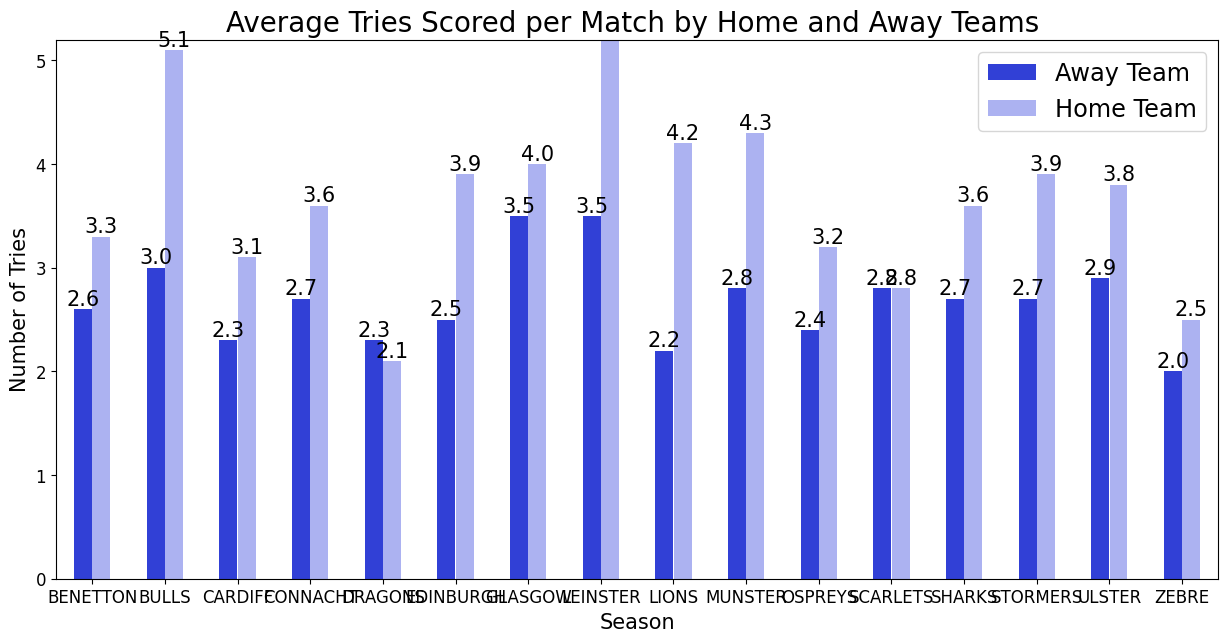

In [30]:


# create a subplot with 2 rows and 1 columns
fig, ax = plt.subplots(1,1, figsize=(15, 7))
# plt.grid(True)
sns.barplot(x="Team", hue="Team Location", y="Tries Scored", 
            data=team_tries_home_away, 
            errorbar=None, 
            fill=True,
            gap=0.01,
            width=0.5,
            palette=['#1529F2', '#A1A9FC'])

bars_0 = ax.containers[0]
ax.bar_label(bars_0, labels=[f'{value:.1f}' for value in bars_0.datavalues], fontsize=15)

bars_1 = ax.containers[1]
ax.bar_label(bars_1, labels=[f'{value:.1f}' for value in bars_1.datavalues], fontsize=15)

plt.ylim(0, 5.2)  # Set the y-axis limits from 0 to 5

ax.axes.set_title("Average Tries Scored per Match by Home and Away Teams ",fontsize=20)
ax.set_xlabel("Season",fontsize=15)
ax.set_ylabel("Number of Tries",fontsize=15)

ax.yaxis.set_tick_params(labelsize = 12);
ax.xaxis.set_tick_params(labelsize = 12);
ax.legend(fontsize='xx-large')

plt.show()